# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
BASE_DIR = os.path.dirname(os.path.abspath('__file__'))
DATA_FEATURED_DIR = os.path.join(BASE_DIR, 'data', 'featured')

df = pd.read_csv(os.path.join(DATA_FEATURED_DIR, 'epl_matches_featured.csv'))
df['date'] = pd.to_datetime(df.date)

In [3]:
df.columns

Index(['season', 'date', 'h_team', 'a_team', 'winner', 'h_score', 'a_score',
       'h_odd', 'd_odd', 'a_odd', 'h_match_points', 'a_match_points',
       'h_standing', 'a_standing', 'ht_pts', 'ht_goals_for',
       'ht_goals_against', 'at_pts', 'at_goals_for', 'at_goals_against',
       'h_ewm_points', 'h_ewm_goals_for', 'h_ewm_goals_against',
       'a_ewm_points', 'a_ewm_goals_for', 'a_ewm_goals_against',
       'h_vs_winrate', 'a_vs_winrate'],
      dtype='object')

## Feature Description
- season: starting season
- date: datetime date
- h_team: home team
- a_team: away team
- winner: home (h) or away (a) or draw (d)
- h_score: goals scored by home team
- a_score: goals scored by away team
- h_odd: home's winning odd
- a_odd: away's winning odd
- h_match_points: points gained by home team
- a_match_points: points gained by away team
- h_standing: home's current standing of the season
- a_standing: away's current standing of the season
- ht_points: home's total points of the season
- ht_goals_for: home's total goals scored of the season
- ht_goals_against: total goals scored against home team of the season
- at_points: away's total points of the season
- at_goals_for: away's total goals scored of the season
- at_goals_against: total goals scored against away team of the season
- h_ewm_points: home's exponential weighted moving average points of the last 3 matches
- h_ewm_goals_for: home's exponential weighted moving average goals scored of the last 3 matches
- h_ewm_gaols_against: home's exponential weighted moving average goals suffered of the last 3 matches
- a_ewm_points: away's exponential weighted moving average points of the last 3 matches
- a_ewm_goals_for: away's exponential weighted moving average goals scored of the last 3 matches
- a_ewm_gaols_against: away's exponential weighted moving average goals suffered of the last 3 matches
- h_vs_winrate: home's winrate against away team of all past matches in the dataset
- a_vs_winrate: away's winrate against home team of all past matches in the dataset

In [4]:
df.head()

,season,date,h_team,a_team,winner,h_score,a_score,h_odd,d_odd,a_odd,...,at_goals_for,at_goals_against,h_ewm_points,h_ewm_goals_for,h_ewm_goals_against,a_ewm_points,a_ewm_goals_for,a_ewm_goals_against,h_vs_winrate,a_vs_winrate
0,2021,2021-11-01,Wolves,Everton,h,2,1,2.24,3.23,3.62,...,15.0,14.0,1.859375,1.593750,1.203125,0.398438,1.332031,2.996094,0.222222,0.444444
1,2021,2021-10-31,Aston Villa,West Ham,a,1,4,2.99,3.55,2.40,...,16.0,10.0,0.300781,1.304688,2.566406,2.484375,1.078125,0.402344,0.153846,0.384615
2,2021,2021-10-31,Norwich,Leeds,a,1,2,3.65,3.69,2.04,...,8.0,16.0,0.375000,0.039062,3.781250,0.917969,0.738281,0.988281,0.000000,0.000000
3,2021,2021-10-30,Tottenham,Manchester Utd,a,0,3,3.12,3.66,2.28,...,16.0,15.0,1.171875,1.078125,1.453125,0.304688,0.781250,3.742188,0.333333,0.428571
4,2021,2021-10-30,Burnley,Brentford,h,3,1,2.64,3.21,2.90,...,11.0,9.0,0.695312,1.152344,1.726562,0.554688,1.015625,1.585938,0.000000,0.000000


In [5]:
df.describe()

,season,h_score,a_score,h_odd,d_odd,a_odd,h_match_points,a_match_points,h_standing,a_standing,...,at_goals_for,at_goals_against,h_ewm_points,h_ewm_goals_for,h_ewm_goals_against,a_ewm_points,a_ewm_goals_for,a_ewm_goals_against,h_vs_winrate,a_vs_winrate
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,...,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,2015.641026,1.523590,1.213846,2.888641,4.128995,4.863423,1.576410,1.184103,10.767692,10.658205,...,24.875641,24.725641,1.284661,1.280464,1.363480,1.396344,1.364086,1.281427,0.248839,0.263869
std,2.965884,1.310368,1.184413,2.123264,1.419728,4.258920,1.328774,1.292928,5.676295,5.643858,...,18.049437,16.765330,0.863276,0.816090,0.818836,0.879390,0.845226,0.777278,0.231770,0.233418
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,1.000000,0.000000,1.650000,3.360000,2.280000,0.000000,0.000000,6.000000,6.000000,...,10.000000,11.000000,0.575012,0.687500,0.785639,0.650020,0.753892,0.726441,0.000000,0.000000
50%,2016.000000,1.000000,1.000000,2.230000,3.620000,3.430000,1.000000,1.000000,11.000000,10.500000,...,23.000000,23.000000,1.156250,1.163615,1.273462,1.380784,1.246818,1.190127,0.230769,0.250000
75%,2018.000000,2.000000,2.000000,3.260000,4.360000,5.540000,3.000000,3.000000,16.000000,15.500000,...,36.000000,36.250000,1.925081,1.765885,1.875000,2.095578,1.897461,1.754128,0.428571,0.461538
max,2021.000000,9.000000,9.000000,26.080000,19.720000,42.050000,3.000000,3.000000,20.000000,20.000000,...,105.000000,79.000000,3.000000,5.125000,5.000000,3.000000,5.533203,5.486328,0.900000,0.900000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   season               3900 non-null   int64         
 1   date                 3900 non-null   datetime64[ns]
 2   h_team               3900 non-null   object        
 3   a_team               3900 non-null   object        
 4   winner               3900 non-null   object        
 5   h_score              3900 non-null   int64         
 6   a_score              3900 non-null   int64         
 7   h_odd                3900 non-null   float64       
 8   d_odd                3900 non-null   float64       
 9   a_odd                3900 non-null   float64       
 10  h_match_points       3900 non-null   int64         
 11  a_match_points       3900 non-null   int64         
 12  h_standing           3900 non-null   float64       
 13  a_standing           3900 non-nul

In [7]:
df.isnull().sum()

season                 0
date                   0
h_team                 0
a_team                 0
winner                 0
h_score                0
a_score                0
h_odd                  0
d_odd                  0
a_odd                  0
h_match_points         0
a_match_points         0
h_standing             0
a_standing             0
ht_pts                 0
ht_goals_for           0
ht_goals_against       0
at_pts                 0
at_goals_for           0
at_goals_against       0
h_ewm_points           0
h_ewm_goals_for        0
h_ewm_goals_against    0
a_ewm_points           0
a_ewm_goals_for        0
a_ewm_goals_against    0
h_vs_winrate           0
a_vs_winrate           0
dtype: int64

Scraped data does not contain any null value. Yay!

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as pylab
import matplotlib.cm as cm
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)
sns.set_palette('colorblind')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, '')

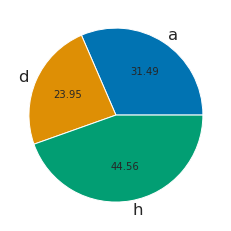

In [9]:
df.groupby('winner').size().plot(kind='pie', autopct='%.2f')
pylab.ylabel('')

Here we see the effect of 'home advantage'.This benefit has been attributed to psychological effects supporting fans have on the competitors or referees; to psychological or physiological advantages of playing near home in familiar situations; to the disadvantages away teams suffer from changing time zones or climates, or from the rigors of travel; and in some sports, to specific rules that favor the home team directly or indirectly. 

## Correlations

In [10]:
# Getting feature columns to correlate with winner
feature_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
result_cols = ['season','date','h_score','a_score','h_match_points','a_match_points']
feature_cols = [col for col in feature_cols if col not in result_cols]
feature_cols

['h_odd',
 'd_odd',
 'a_odd',
 'h_standing',
 'a_standing',
 'ht_pts',
 'ht_goals_for',
 'ht_goals_against',
 'at_pts',
 'at_goals_for',
 'at_goals_against',
 'h_ewm_points',
 'h_ewm_goals_for',
 'h_ewm_goals_against',
 'a_ewm_points',
 'a_ewm_goals_for',
 'a_ewm_goals_against',
 'h_vs_winrate',
 'a_vs_winrate']

In [11]:
# Convert winner result classes to binary representations
df['winner_h'] = np.where(df.winner == 'h', 1, 0)
df['winner_a'] = np.where(df.winner == 'a', 1, 0)
df['winner_d'] = np.where(df.winner == 'd', 1, 0)

In [12]:
df[feature_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()

,index,winner_h
0,winner_h,1.000000
1,a_odd,0.341694
2,d_odd,0.200191
3,a_standing,0.193533
4,h_vs_winrate,0.180056
5,ht_goals_for,0.167070
6,ht_pts,0.166213
7,h_ewm_points,0.149156
8,h_ewm_goals_for,0.140587
9,a_ewm_goals_against,0.112471


In [13]:
df[feature_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()

,index,winner_a
0,winner_a,1.000000
1,h_odd,0.354133
2,a_vs_winrate,0.198681
3,h_standing,0.188339
4,a_ewm_points,0.118128
5,a_ewm_goals_for,0.114630
6,at_goals_for,0.112622
7,at_pts,0.109294
8,h_ewm_goals_against,0.064166
9,ht_goals_against,0.057010


In [14]:
df[feature_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()

,index,winner_d
0,winner_d,1.000000
1,h_standing,0.058009
2,h_ewm_goals_against,0.050445
3,a_ewm_points,0.025197
4,a_ewm_goals_for,0.015193
5,a_vs_winrate,0.002935
6,a_standing,-0.005564
7,ht_goals_against,-0.012823
8,a_ewm_goals_against,-0.013572
9,at_pts,-0.033117


### Observations
1. As expected, betting odds have the highest correlations.
2. Season standing and historcal match-up winrates are also important.
3. Draws are harder to predict than wins or losses.